In [74]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets, model_selection, preprocessing, metrics
import scipy.stats as stats
%matplotlib inline


In [53]:
# Fetching dataset from sklearn datasets module

california = datasets.fetch_california_housing()

california.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [54]:
california['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [55]:
# Load fetched dataset into a dataframe

X = pd.DataFrame(california['data'], columns = california['feature_names'])
y = pd.DataFrame(california['target'])

# Rename target column to 'house_price'

y.rename({0:'house_price'}, axis = 1, inplace = True)
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [56]:
y.head()

house_price
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422

In [57]:
# Concatenate X and y to get full dataset to work with 

df = pd.concat([X, y], axis = 1)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [58]:
# Get summary statistics for the dataset

df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   house_price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [59]:
# Get info about the dataset and its features

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Since all the data is present, we can proceed(Hint, most sklearn datasets are usually clean. Here, our focus is EDA so we shall proceed swiftly)<br>

So, the first thing I ask myself is how the houses in the dataset are scattered across the state of California. We could easily show that using a scatter mapbox

In [60]:
px.scatter_mapbox(
    data_frame = df,
    lat = 'Latitude',
    lon = 'Longitude',
    
    
)

In [61]:
# Scatter Mapbox Plot with Hover Data as house prices
fig = px.scatter_mapbox(
    df, 
    lat="Latitude",
    lon="Longitude",
    hover_data=["house_price"],
    color="house_price",
    height=1000,
    width=1200,
    title="Scatter Mapbox of California Cities")

# Set mapbox style (you can change to 'open-street-map', 'carto-positron', etc.)
fig.update_layout(mapbox_style="open-street-map")

# Show the plot
fig.show()

While it isn't clear whether price increases(though it may be possible) as you go towards the north of California, it is quite easy to see that house prices increase as we move towards the coast. 

In [62]:
# Scatter Mapbox Plot with Hover Data as Population
fig = px.scatter_mapbox(
    df, 
    lat="Latitude",
    lon="Longitude",
    hover_data=["Population"],
    color="Population",
    height=1000,
    width=1200,
    title="Scatter Mapbox of California Cities")

# Set mapbox style (you can change to 'open-street-map', 'carto-positron', etc.)
fig.update_layout(mapbox_style="open-street-map")

# Show the plot
fig.show()

Interesting to see that population is quite evenly distributed across the whole of California. 

df.corr()

Correlation would be quite important in trying to figure out what influences house prices the most and what has the least effect, and also relationships that may not have been anticipated

In [63]:
# Get Correlation Matrix

corr_mtrx = df.corr()
corr_mtrx


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
house_price  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  house_price  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
house_price -0.144160  -0.045967     1.000000

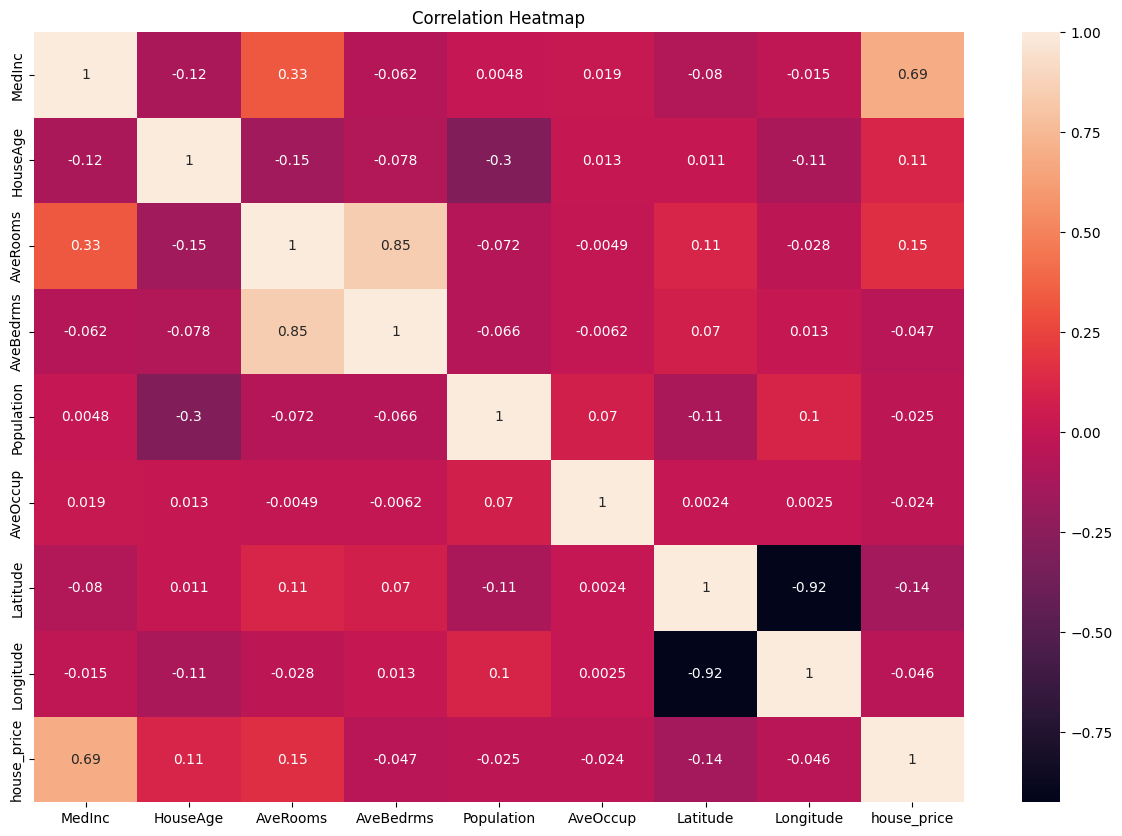

In [64]:
# Plotting a correlation heatmap using seaborn
plt.figure(figsize = (15, 10));

sns.heatmap(
    corr_mtrx,
    annot = True,
    #cmap =
);

plt.title('Correlation Heatmap');



Some key things to notice here. Median Income has the highest correlation with House Prices. While correlation doesn't imply causation, it is only logical that if you have more median income, you are more likely to have a more expensive house.<br>
Also, just like we had implied from the scatter mapbox, we can see the very very small correlation implying that prices increase as we go lower, and as we go towards the coast, price increases.

We can also note the correlation between average rooms and average bedrooms, which when you think logically, the number of bedrooms will have some effect on the number of rooms since bedrooms will be part of total rooms. While this may be viewed as leakage columns, it might not necessarily be so. This is because bedrooms are a separate entity and they heavily determine the desire to buy any house, so I don't necessarily think we should drop any of those columns


In [65]:
px.scatter(
    data_frame = df,
    x = 'MedInc',
    y = 'house_price',
    width = 1000,
    height = 600 
    )


Something very worthy of noting. We can tell that there are two types of data points that would be a problem for us if we input them into any model. One is capped values, and the second one are outliers.
Based on the scatter plot above, it is clear that there are a lot of capped figures, and also if we were to draw a line of best fit, some data points seem like they would be pretty far from the line.

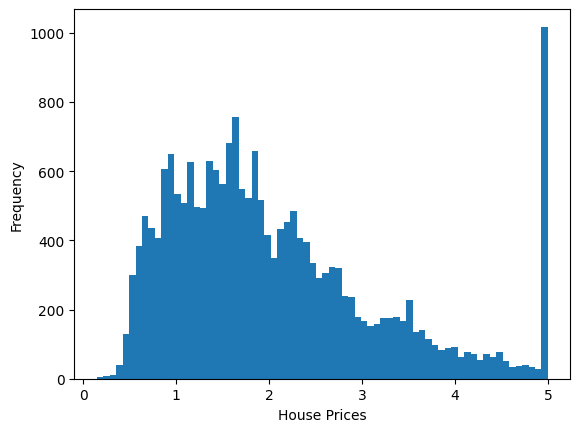

In [66]:
plt.hist(
    x = df['house_price'],
    bins =
     70
);
plt.xlabel('House Prices')
plt.ylabel('Frequency');

Another thing we have spotted is that the dataset above is left skewed, and the capped values can easily be seen.

In [70]:
features = ['house_price']

# Plot all the features as separate boxplots
fig = px.box(
    df,
    y=features,
    title="Boxplots for Multiple Features",
    width = 800,
    height = 800,
    points = 'outliers'   
    
    )

fig.update_traces(marker=dict(size=6, opacity=0.6, color="blue"),  # Size and color for outliers
                  jitter=0.3)  # Spread out overlapping points

fig.show()

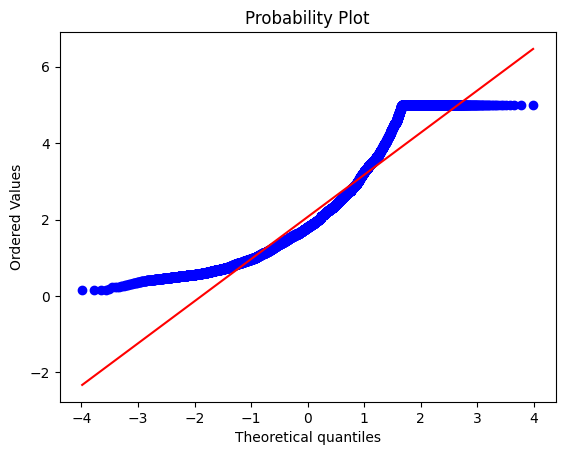

In [76]:
stats.probplot(
    df['house_price'],
    dist = 'norm',
    plot = plt);

Outliers are present! And we must chop them off! Also we must deal with the skewed data. 